In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# %tensorflow_version 2.x
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
digits = load_digits()

In [5]:
X, y = digits.data, digits.target
y_cat = to_categorical(y, 10)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    test_size=0.3)

In [9]:
X_train.shape

(1257, 64)

In [15]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

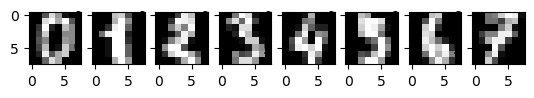

In [19]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1, 8, 8)[i], cmap='gray')
plt.show()

In [21]:
K.clear_session()

model = Sequential()
model.add(Input(shape=(64,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [27]:
initial_weights = model.get_weights() #  현재 Keras 모델의 모든 가중치(weight)와 편향(bias)을 가져와서 저장하는 것입니다.

### model.get_weights()
model.get_weights()는 모델의 **모든 층(layer)**에 있는 가중치(Weights)와 편향(Bias) 값을 리스트로 반환합니다.  
반환값은 numpy 배열들의 리스트입니다.  
예를 들어 Dense 레이어 2개짜리 모델이라면:  
```python
initial_weights = [
    weights_1,  # 첫 번째 Dense 층의 가중치 (예: (input_dim, units))
    bias_1,     # 첫 번째 Dense 층의 편향 (예: (units,))
    weights_2,  # 두 번째 Dense 층의 가중치
    bias_2      # 두 번째 Dense 층의 편향
]
```
#### 언제 쓰나요? 
| 상황                   | 설명                                                             |
| -------------------- | -------------------------------------------------------------- |
| 🔁 여러 번 모델을 반복 학습할 때 | 매번 초기 상태에서 시작하려고 저장해둠                                          |
| 🔄 학습 전후 비교          | 학습 전 가중치와 학습 후 가중치 비교                                          |
| 🔄 가중치 리셋            | `model.set_weights(initial_weights)`를 사용해서 **처음 상태로 되돌릴 수 있음** |

#### 예시
```python
initial_weights = model.get_weights()
# 모델 학습
model.fit(X_train, y_train, epochs=10)
# 원래 상태로 리셋
model.set_weights(initial_weights)
```


In [30]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
# we will train a m>odel with different sizes of data sets
train_sizes

# 왜 이렇게 하나요?
# 모델이 적은 데이터로도 잘 학습되는지 확인하기 위해
# 학습 곡선 (learning curve) 을 그리기 위해 자주 사용됩니다

array([ 125,  502,  879, 1255])

In [34]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)

    # at each iteration reset the weights of the model
    # to the initial random weights
    model.set_weights(initial_weights)

    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=300,
                  callbacks=[EarlyStopping(monitor='loss', patience=1)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])

    e = model.evaluate(X_test, y_test, verbose=0)
    test_scores.append(e[-1])

    print("Done size: ", train_size)

Done size:  125
Done size:  502
Done size:  879
Done size:  1255


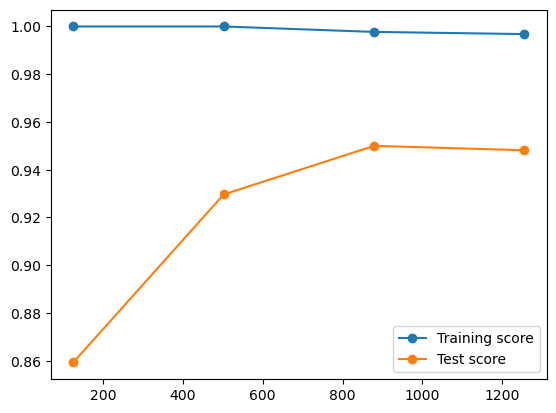

In [35]:
# our model is actually good enough for this problem, we just need more data it seems
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")
plt.show()